In [1]:
# Data processing
import pandas as pd
import numpy as np

# Modelling
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Show plot
def show_plt(X, total_plts=1, plt_size=5):
    """
    shows plot for images
    """
    plt.figure(figsize=(total_plts * plt_size, plt_size))

    for i in range(total_plts):
        plt.subplot(1, plt_size, i+1)
        plt.axis('off')
        plt.imshow(X[59999-i, :].reshape(28, 28), cmap='gray')
    plt.show()

In [4]:
# show anomalies
def show_anomalies(predictions, X, n_img_per_row=32):
    """
    shows a plot with anomaly images and normal images
    """
    img = np.zeros((28 * 2, 28 * n_img_per_row))
    anolabels = [-1, 1]

    for i in range(2):
        ix = 28 * i
        X_ano = X[predictions == anolabels[i], :]
        try:
            for j in range(n_img_per_row):
                iy = 28 * j
                img[ix:ix + 28, iy:iy + 28] = X_ano[j, :].reshape(28, 28)
        except IndexError:
            pass

    plt.figure(figsize=(12, 12))
    plt.imshow(img, cmap='gray')
    plt.title('Examples of anomalies (upper row) and normal data (lower row)')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
# show output
def show_output(prediction, x_train, y_train):
    """
    Predicts the model result
    """
    show_anomalies(prediction, x_train)
    # print("Classification report")
    # print(classification_report(y_train, (prediction > 0)))
    # print("--------------------")
    print("Accuracy")
    print(accuracy_score(y_train, prediction))
    # print("--------------------")
    # print("Recall")
    # print(recall_score(data, prediction, average=None))
    # print("--------------------")
    # print("Precision")
    # print(precision_score(data, prediction, average=None))
    # print("--------------------")

    # result(x_train, y_train, prediction)


def result(x_train, y_train, prediction):
    """
    Makes result of the model
    """
    cm = confusion_matrix(y_true=x_train, y_pred=prediction, labels=y_train)
    plt.figure(figsize=(5, 5))
    sn.heatmap(cm, annot=True)
    plt.xlabel('predicted')
    plt.ylabel('truth')
    plt.show()

Dataset split: 60000 train rows 10000 test rows


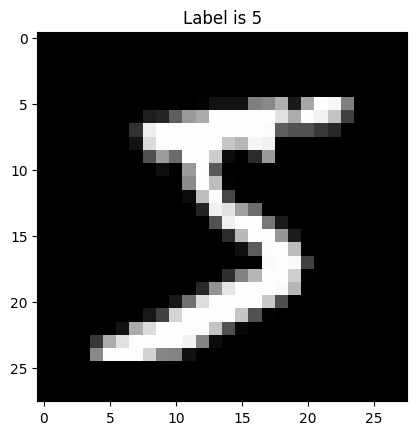

In [6]:
# Initialize
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Dataset split: {len(x_train)} train rows",
          f"{len(x_test)} test rows")
point = np.array(x_train[0], dtype='uint8')
point = point.reshape((28, 28))

plt.title('Label is {label}'.format(label=y_train[0]))
plt.imshow(point, cmap='gray')
plt.show()

In [7]:
# Add outliers
print()
print('MNIST dataset loaded')
print(f'X: {x_train.shape}')
print(f'Y: {y_train.shape}')

# Creating outlier in our data
x_train = 255 - x_train

np.random.shuffle(x_train)
for i in np.random.randint(0, x_train.shape[1], int(x_train.shape[1]*0.1)):
        x_train[len(x_train) - 3, i] = 0.0 if np.random.rand() < 0.5 else 255.0

# show_plt(x_train, 3, 6)


MNIST dataset loaded
X: (60000, 28, 28)
Y: (60000,)


In [8]:
# prepare model
n_estimators = 1000
if_contamination = 'auto'

model = IsolationForest(
        n_estimators=n_estimators, contamination=if_contamination, random_state=42, max_samples='auto')
nsamples, nx, ny = x_train.shape
data = x_train.reshape(nsamples, nx*ny)

prediction [ 1  1  1 ... -1 -1  1]
data: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Number of anomalies: 8672


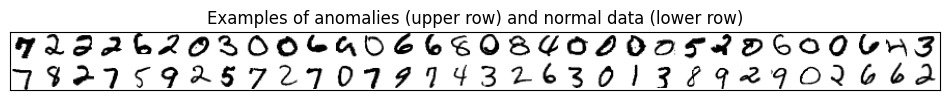

Accuracy
0.09663333333333333


In [9]:
# train model
# data = data.reshape(-1, 1)
prediction = model.fit(data).predict(data)
# prediction = model.fit_predict(data.reshape(-1, 1))
print(f'prediction {prediction}')
print(f'data: {data}')
print('Number of anomalies:', np.sum(prediction == -1))

show_output(prediction, x_train, y_train)